In [ ]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
 !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Jul  8 10:10 kaggle.json


In [ ]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [ ]:
path = Config.data_path()/'planet'
path.mkdir(exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

404 - Not Found
404 - Not Found
unzip:  cannot find or open /root/.fastai/data/planet/train_v2.csv.zip, /root/.fastai/data/planet/train_v2.csv.zip.zip or /root/.fastai/data/planet/train_v2.csv.zip.ZIP.


In [ ]:
!apt-get install p7zip-full
!p7zip -d /content/data/planet/train-jpg.tar.7z


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/data/planet/                               1 file, 629296207 bytes (601 MiB)

Extracting archive: /content/data/planet/train-jpg.tar.7z
--
Path = /content/data/planet/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-j

In [ ]:
!tar -xvf /content/train-jpg.tar

tar: /content/train-jpg.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!mv 

In [ ]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
np.random.seed(42)
data = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct(0.2)
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use 

In [ ]:
!cp -r /content/train-jpg /content/data/planet/

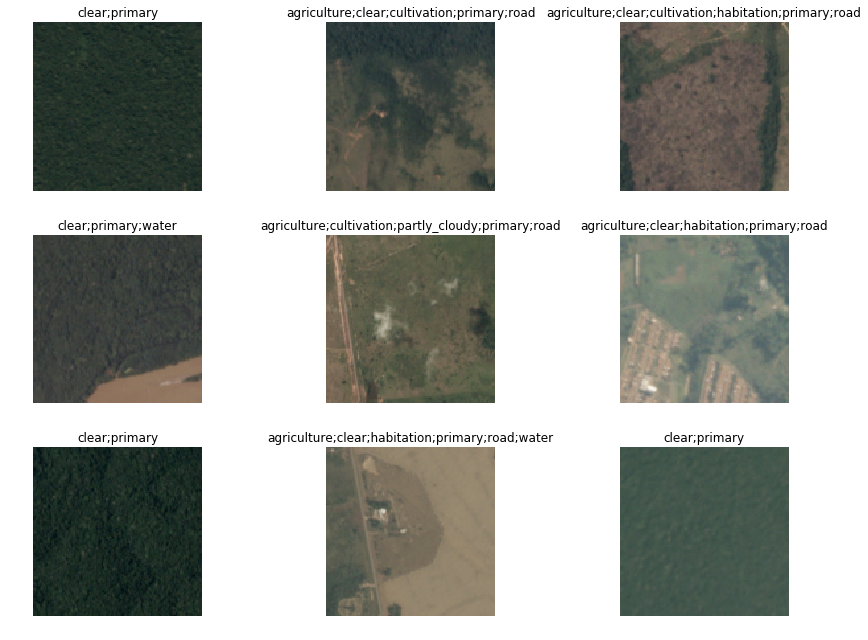

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
arch = models.resnet50

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 98450157.54it/s]


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


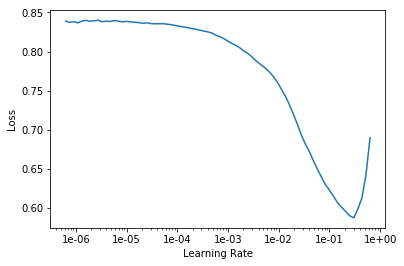

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(0.01))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.128516,0.115447,0.944061,0.896523,03:48
1,0.108763,0.097455,0.951677,0.914985,03:42
2,0.104326,0.090807,0.953239,0.920567,03:40
3,0.096496,0.087527,0.953559,0.923744,03:41
4,0.090099,0.086423,0.955332,0.925584,03:41


In [ ]:
learn.save('stage-1-rn50')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


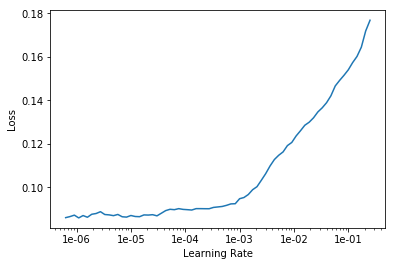

In [ ]:
learn.lr_find()
learn.recorder.plot()